In [1]:
# imports libraries
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import math
import sklearn.decomposition as dcmp
import pyaudio
import csv
import IPython

%matplotlib inline 

# Grabs the preprocessing and automatic_sync files
sys.path.append(os.path.join(os.pardir,'pythonCode'))
import preprocessing as pp
import automatic_sync as autoS
import audio

In [2]:
# Determines which cameras will be selected (['Bents'],['Camera Location'],['Motion #'])
filt = (None,None,['18']) # Selects the bent 1 camera used during motion 18

# now reads in the datafile from the raw data folder
rawDataPath = os.path.join(os.pardir,'rawData')
files = glob.glob(os.path.join(rawDataPath, '*.wav'))
names = []
        
for name in files:
    fileName = os.path.basename(name).split(".")[0]
    names.append(fileName)

# Applies filter to camera names and returns only selected subset names
audioFiles = pp.getKeys(names,filt);
# Reads the .wav files from the list generted by getKeys
(names,rawDataset) = pp.readWAV(rawDataPath,audioFiles);

Opening GP_B1_NL_18 ...
Opening GP_B1_NU_18 ...
Opening GP_B1_SL_18 ...
Opening GP_B1_SU_18 ...
Opening GP_B2_SL_18 ...
Opening GP_B2_SU_18 ...
Opening GP_B3_NL_18 ...
Opening GP_B3_NU_18 ...
Opening GP_B3_SL_18 ...
Opening GP_B3_SU_18 ...


C:\Users\Travis\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7027: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


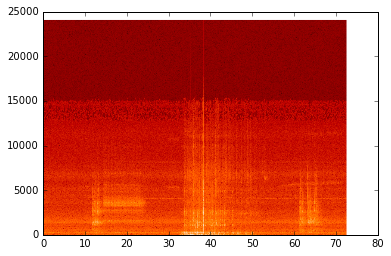

In [7]:
chan = rawDataset[names[7]][:,0]

Pxx, freqs, bins, im = plt.specgram(chan, NFFT=1024, Fs=48000, noverlap=512,cmap=plt.cm.gist_heat)

In [8]:
ridgeline = np.zeros((len(freqs),len(bins)))
Pvals = np.zeros((len(freqs),len(bins)))

baseline = np.mean(Pxx)

for ii in range(len(freqs)):
    chanii = Pxx[ii]
    relMax = signal.argrelmax(chanii)
    
    peaks = [idx for idx in relMax[0] if chan[idx] > baseline]

    ridgeline[ii,peaks]=np.ones(len(peaks))
    Pvals[ii,:] = chanii

In [ ]:
filt_signal = Pvals[:,506] #-signal.medfilt(Pvals[30,:],3)
plt.plot(filt_signal)
#max_ind = signal.argrelmax(filt_signal,order=100)
#plt.plot(max_ind[0],filt_signal[max_ind[0]],'ro')
plt.show()

In [ ]:
max_ind[1].shape

In [16]:
ridge_lines = identify_ridge_lines(Pvals[:,:], 0*np.ones(len(bins)), 10)

fracture
fracture
fracture
fracture
fracture
fracture
fracture
fracture
fracture
fracture
fracture
fracture
fracture

C:\Users\Travis\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Travis\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



fracture
fracture
fracture


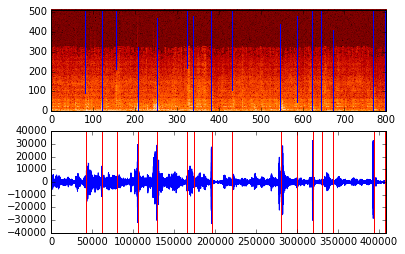

In [17]:
#plt.figure(figsize=(20,10))
this_range = range(3200,4000)
ax = plt.subplot(2,1,1)

#x,y = np.meshgrid(bins[this_range],freqs)

heatmap = ax.pcolorfast(20*np.log10(Pvals[:,this_range]), cmap=plt.cm.gist_heat)

for x in ridge_lines:
    if len(x[1]) > 200 and x[1][1] > this_range[0] and x[1][1] < this_range[-1]:
        plt.plot(x[1]-this_range[0],len(freqs)-x[0],'b')
        print('fracture')
        
tStart = 48000*bins[this_range][0]
tEnd = 48000*bins[this_range][-1]

plt.subplot(2,1,2)
plt.plot(chan[tStart:tEnd])
for x in ridge_lines:
    if len(x[1]) > 200 and x[1][1] > this_range[0] and x[1][1] < this_range[-1]:
        plt.plot([48000*bins[x[1][0]-this_range[0]+.5],48000*bins[x[1][0]-this_range[0]]],[-40000,40000],'r')
plt.xlim((0,tEnd-tStart))
plt.show()
#audio.play_sound(12000,chan[tStart:tEnd])

In [4]:
import librosa

# now reads in the datafile from the raw data folder
fpath = os.path.join(os.pardir,'rawData','GP_B1_NL_18.wav')
y, sr = librosa.load(fpath,sr=None,mono=True,dtype='float64')
y_harmonic, y_percussive = librosa.effects.hpss(y)

C:\Users\Travis\Anaconda3\lib\site-packages\librosa\core\audio.py:37: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


In [ ]:
plt.plot(y_percussive)

In [5]:
# plays the sound (checks to make sure that the sampling frequency is right)
IPython.display.Audio(y.T,rate=48000)

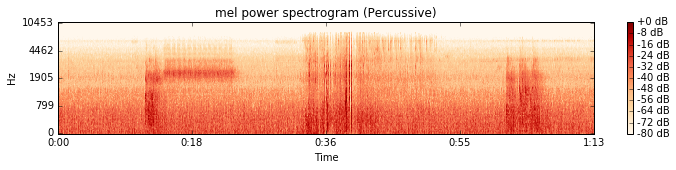

In [9]:
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)
log_Sp = librosa.logamplitude(S_percussive, ref_power=np.max)

plt.figure(figsize=(12,2))
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram (Percussive)')
plt.colorbar(format='%+02.0f dB')

In [33]:
log_Sp.shape[0]/12

10.666666666666666

In [11]:
ridge_lines = identify_ridge_lines(log_Sp, 0*np.ones(log_Sp.shape[1]), int(log_Sp.shape[0]/3))
print(len(ridge_lines))

NameError: name 'log_Sp' is not defined

fracture
fracture
fracture
fracture
fracture
fracture
fracture
fracture
fracture
fracture
fracture
fracture


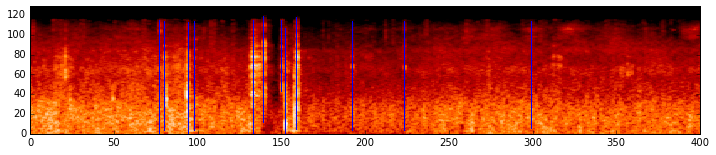

In [51]:
plt.figure(figsize=(12,5))
this_range = range(3000,4000)
ax = plt.subplot(2,1,1)

#x,y = np.meshgrid(bins[this_range],freqs)

heatmap = ax.pcolorfast(log_Sp[:,this_range], cmap=plt.cm.gist_heat)

for x in ridge_lines:
    if len(x[1]) > 5*log_Sp.shape[0]/12 and x[1][1] > this_range[0] and x[1][1] < this_range[-1]:
        plt.plot(x[1]-this_range[0],x[0],'b')
        print('fracture')
        
#tStart = 48000*bins[this_range][0]
#tEnd = 48000*bins[this_range][-1]

#plt.subplot(2,1,2)
#plt.plot(chan[tStart:tEnd])
#for x in ridge_lines:
#    if len(x[1]) > 200 and x[1][1] > this_range[0] and x[1][1] < this_range[-1]:
#        plt.plot([48000*bins[x[1][0]-this_range[0]+.5],48000*bins[x[1][0]-this_range[0]]],[-40000,40000],'r')
#plt.xlim((0,tEnd-tStart))
#plt.show()
#audio.play_sound(12000,chan[tStart:tEnd])

In [3]:
def identify_ridge_lines(matr, max_distances, gap_thresh):
    """
    Identify ridges in the 2D matrix. Expect that the width of
    the wavelet feature increases with increasing row number.

    Parameters
    ----------
    matr: 2-D ndarray
        Matrix in which to identify ridge lines.
    max_distances: 1-D sequence
        At each row, a ridge line is only connected
        if the relative max at row[n] is within
        `max_distances`[n] from the relative max at row[n+1].
    gap_thresh: int
        If a relative maximum is not found within `max_distances`,
        there will be a gap. A ridge line is discontinued if
        there are more than `gap_thresh` points without connecting
        a new relative maximum.

    Returns
    -------
    ridge_lines: tuple
        tuple of 2 1-D sequences. `ridge_lines`[ii][0] are the rows of the ii-th
        ridge-line, `ridge_lines`[ii][1] are the columns. Empty if none found.
        Each ridge-line will be sorted by row (increasing), but the order
        of the ridge lines is not specified

    References
    ----------
    Bioinformatics (2006) 22 (17): 2059-2065.
    doi: 10.1093/bioinformatics/btl355
    http://bioinformatics.oxfordjournals.org/content/22/17/2059.long

    Examples
    --------
    >>> data = np.random.rand(5,5)
    >>> ridge_lines = identify_ridge_lines(data, 1, 1)

    Notes:
    ------
    This function is intended to be used in conjuction with `cwt`
    as part of find_peaks_cwt.
    """

    if(len(max_distances) < matr.shape[0]):
        raise ValueError('Max_distances must have at least as many rows as matr')

    all_max_cols = boolrelextrema(matr, np.greater, axis=1, order=1)
    #Highest row for which there are any relative maxima
    has_relmax = np.where(all_max_cols.any(axis=1))[0]
    if(len(has_relmax) == 0):
        return []
    start_row = has_relmax[-1]
    #Each ridge line is a 3-tuple:
    #rows, cols,Gap number
    ridge_lines = [[[start_row],
                   [col],
                   0] for col in np.where(all_max_cols[start_row])[0]]
    final_lines = []
    rows = np.arange(start_row - 1, -1, -1)
    cols = np.arange(0, matr.shape[1])
    for row in rows:
        this_max_cols = cols[all_max_cols[row]]

        #Increment gap number of each line,
        #set it to zero later if appropriate
        for line in ridge_lines:
            line[2] += 1

        #XXX These should always be all_max_cols[row]
        #But the order might be different. Might be an efficiency gain
        #to make sure the order is the same and avoid this iteration
        prev_ridge_cols = np.array([line[1][-1] for line in ridge_lines])
        #Look through every relative maximum found at current row
        #Attempt to connect them with existing ridge lines.
        new_lines = []
        for ind, col in enumerate(this_max_cols):
            """
            If there is a previous ridge line within
            the max_distance to connect to, do so.
            Otherwise start a new one.
            """
            line = None
            if(len(prev_ridge_cols) > 0):
                diffs = np.abs(col - prev_ridge_cols)
                closest = np.argmin(diffs)
                if diffs[closest] <= max_distances[row]:
                    line = ridge_lines[closest]
            if(line is not None):
                #Found a point close enough, extend current ridge line
                line[1].append(col)
                line[0].append(row)
                line[2] = 0
            else:
                new_line = [[row],
                            [col],
                            0]
                ridge_lines.append(new_line)

        #Remove the ridge lines with gap_number too high
        #XXX Modifying a list while iterating over it.
        #Should be safe, since we iterate backwards, but
        #still tacky.
        for ind in range(len(ridge_lines) - 1, -1, -1):
            line = ridge_lines[ind]
            if line[2] > gap_thresh:
                final_lines.append(line)
                del ridge_lines[ind]

    out_lines = []
    for line in (final_lines + ridge_lines):
        sortargs = np.array(np.argsort(line[0]))
        rows, cols = np.zeros_like(sortargs), np.zeros_like(sortargs)
        rows[sortargs] = line[0]
        cols[sortargs] = line[1]
        out_lines.append([rows, cols])
    return out_lines

In [4]:
def boolrelextrema(data, comparator,
                  axis=0, order=1, mode='clip'):
    """
    Calculate the relative extrema of `data`.

    Relative extrema are calculated by finding locations where
    comparator(data[n],data[n+1:n+order+1]) = True.

    Parameters
    ----------
    data: ndarray
    comparator: function
        function to use to compare two data points.
        Should take 2 numbers as arguments
    axis: int, optional
        axis over which to select from `data`
    order: int, optional
        How many points on each side to require
        a `comparator`(n,n+x) = True.
    mode: string, optional
        How the edges of the vector are treated.
        'wrap' (wrap around) or 'clip' (treat overflow
        as the same as the last (or first) element).
        Default 'clip'. See numpy.take

    Returns
    -------
    extrema: ndarray
        Indices of the extrema, as boolean array
        of same shape as data. True for an extrema,
        False else.

    See also
    --------
    argrelmax,argrelmin

    Examples
    --------
    >>> testdata = np.array([1,2,3,2,1])
    >>> argrelextrema(testdata, np.greater, axis=0)
    array([False, False,  True, False, False], dtype=bool)
    """

    if((int(order) != order) or (order < 1)):
        raise ValueError('Order must be an int >= 1')

    datalen = data.shape[axis]
    locs = np.arange(0, datalen)

    results = np.ones(data.shape, dtype=bool)
    main = data.take(locs, axis=axis, mode=mode)
    for shift in range(1, order + 1):
        plus = data.take(locs + shift, axis=axis, mode=mode)
        minus = data.take(locs - shift, axis=axis, mode=mode)
        results &= comparator(main, plus)
        results &= comparator(main, minus)
        if(~results.any()):
            return results
    return results